In [6]:
"""Load the Boston dataset and examine its target (label) distribution."""

# Load libraries
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cross_validation import ShuffleSplit, train_test_split, KFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

plt.style.use('bmh')
print plt.style.available

[u'seaborn-darkgrid', u'seaborn-notebook', u'seaborn-muted', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'classic', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [18]:
import os
from jupyter_core.paths import jupyter_config_dir, jupyter_data_dir
os.path.join(jupyter_data_dir(), 'templates')

'/home/fch/.local/share/jupyter/templates'

#    Algorithm

In [3]:
def load_data():
    """Load the Boston dataset."""

    boston = datasets.load_boston()
    return boston

In [103]:
def explore_city_data(city_data):
    """Calculate the Boston housing statistics."""

    # Get the labels and features from the housing data
    housing_prices = city_data.target
    housing_features = city_data.data

    ###################################
    ### Step 1. YOUR CODE GOES HERE ###
    ###################################

    # Please calculate the following values using the Numpy library

    # Size of data (number of houses)?
    n_rows = np.shape(city_data.data)[0]
    print 'Number of houses in data set: {}'.format(n_rows)

    # Number of features?
    n_features = np.shape(city_data.data)[1]
    print 'Number of features: {}'.format(n_features)

    # Minimum price?
    price_min = np.min(city_data.target)
    print 'Minimum house price in dataset: {0}'.format(price_min)

    # Maximum price?
    price_max = np.max(city_data.target)
    print 'Maximum house price in dataset: {0}'.format(price_max)

    # Calculate mean price?
    price_mean = np.mean(city_data.target)
    print 'Average house price: {0}'.format(price_mean)

    # Calculate median price?
    price_median = np.median(city_data.target)
    print 'Median house price: {0}'.format(price_median)

    # Calculate standard deviation?
    price_std = np.std(city_data.target)
    print 'House price standard deviation: {0}'.format(price_std)

In [104]:
def performance_metric(label, prediction):
    """Calculate and return the appropriate error performance metric."""

    ###################################
    ### Step 2. YOUR CODE GOES HERE ###
    ###################################

    # http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
    return mean_squared_error(label, prediction)**0.5

In [129]:
def split_data(city_data, train_size=0.7):
    """Randomly shuffle the sample set. Divide it into 70 percent training and 30 percent testing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    ###################################
    ### Step 3. YOUR CODE GOES HERE ###
    ###################################
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)
    return X_train, y_train, X_test, y_test


In [130]:
def learning_curve(depths, X_train, y_train, X_test, y_test):
    """Calculate the performance of the model after a set of training data."""

    # print "Decision Tree with Max Depth: "
    # print depth

    # We will vary the training set size so that we have 50 different sizes
    # Make as an argument to only create once and use for all call in the loop.
    num_of_sizes = 50
    sizes = np.linspace(1, len(X_train), num_of_sizes)

    total_size = num_of_sizes * len(depths)

    # Initialize a empty Numpy arrays for all training/test errors
    train_err_all = np.empty(0)
    test_err_all = np.empty(0)

    # Repeat each depth value 50 times (num_of_sizes)
    depths_all = np.repeat(depths, num_of_sizes)

    # Repeat the sizes sequence (np.linspace()..) so each step is labeled in each depth
    size_all = np.resize(sizes, total_size)

    fill_index = 0

    for depth in depths:
        test_err, train_err = train_decision_tree(sizes, depth, X_test, X_train, y_test, y_train)

        train_err_all = np.append(train_err_all, train_err)
        test_err_all = np.append(test_err_all, test_err)

        fill_index += num_of_sizes

    learning_curve_df = pd.DataFrame({'Depth': depths_all,
                                      'Training Error': train_err_all,
                                      'Test Error': test_err_all,
                                      'Size': size_all})

    learning_curve_graph_pd(learning_curve_df)

In [131]:
def train_decision_tree(sizes, depth, X_test, X_train, y_test, y_train):
    """
    Args:
        sizes   (Numpy array): Array of training sample sizes to train on.
        depth   (int): The maximum depth of the DecisionTreeRegressor
        X_test  (Numpy array): Test set features
        X_train (Numpy array): Training set features
        y_test  (Numpy array): Test set target variable
        y_train (Numpy array): Training set target variable

    Returns:
        test_err  (Numpy array): Test set predictions.
        train_err (Numpy array): Training set predictions.
    """

    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    for i, s in enumerate(sizes):
        # Create and fit the decision tree regressor model
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])

        # Find the performance on the training and testing set
        train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    return test_err, train_err

In [132]:
def learning_curve_graph_pd(df):
    # TODO: Add docstrings
    # key = each Depth value
    # grp is each sub-dataframe filtered by the Depth value of 'key'
    fig = plt.figure(figsize=(16, 18))
    ax = fig.add_subplot(1,1,1)

    for i, key_group_pair in enumerate(df.groupby(['Depth'])):
        key, grp = key_group_pair
        each_ax = fig.add_subplot(5, 2, i + 1)
        #each_ax.set_ylim([0, 80])
        each_ax.set_title('Depth: {}'.format(i + 1))
        each_ax.plot(grp['Size'], grp['Test Error'])
        each_ax.plot(grp['Size'], grp['Training Error'])

    plt.suptitle('Train & Test set error as a function of training set size', fontsize=20)
    plt.legend(loc='best')

    # Turn off axis lines and ticks of the big subplot
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    ax.set_ylabel('Mean Squared Error',fontsize=20)
    ax.set_xlabel('Training set size', fontsize=20, horizontalalignment='center')

    plt.show()

In [133]:
def learning_curve_graph(sizes, train_err, test_err, show=True):
    """Plot training and test error as a function of the training size."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Training Size')
    pl.plot(sizes, test_err, lw=2, label='test error')
    pl.plot(sizes, train_err, lw=2, label='training error')
    pl.legend()
    pl.xlabel('Training Size')
    pl.ylabel('Error')
    pl.show()

In [110]:
def model_complexity(X_train, y_train, X_test, y_test):
    """Calculate the performance of the model as model complexity increases."""

    print "Model Complexity: "

    # We will vary the depth of decision trees from 2 to 25
    max_depth = np.arange(1, 25)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth=d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    model_complexity_graph(max_depth, train_err, test_err)

In [264]:
def model_complexity_graph(max_depths, train_err, test_err):
    """Plot training and test error as a function of the depth of the decision tree learn."""
    # Change to matplotlib.pyplot for pyplot.xticks() to accept a list in ipython
    
    plt.figure(figsize=(12, 9))
    plt.title('Decision Trees: Performance vs Max Depth')
    plt.plot(max_depths, test_err, lw=2, label='test error')
    plt.plot(max_depths, train_err, lw=2, label='training error')
    plt.xticks(max_depths)
    plt.legend()
    plt.xlabel('Max Depth')
    plt.ylabel('Error')
    plt.show()

Model Complexity: 


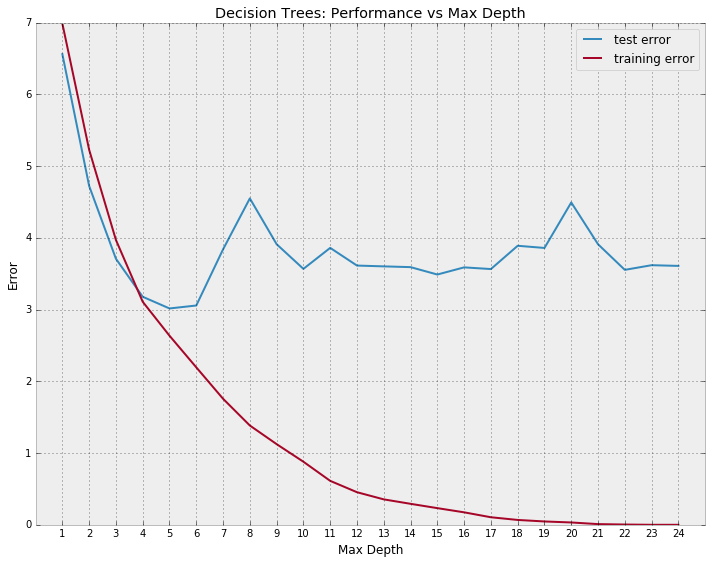

In [265]:
# Model Complexity Graph
model_complexity(X_train, y_train, X_test, y_test)

In [232]:
def fit_predict_model(city_data, verbose=True):
    # TODO: Add docstrings
    """Find and tune the optimal model. Make a prediction on housing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    # Setup a Decision Tree Regressor
    regressor = DecisionTreeRegressor()

    parameters = {'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)}

    ###################################
    ### Step 4. YOUR CODE GOES HERE ###
    ###################################
    # TODO: Add train/test split to fit_predict() to fit on testing data only as part of best practices.
    
    # Training/Test dataset split
    # We'll give a larger train size split here since we will be doing K-fold grid search cross validation
    # over the training set and our dataset is not very big to being with.
    X_train, y_train, X_test, y_test = split_data(city_data, train_size=0.90)
    
    # TODO: Move KFold justification to report outside script.
    # 1. Find the best performance metric
    # should be the same as your performance_metric procedure
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

    mse_scorer = make_scorer(performance_metric,  # Use our performance metric, which is just mean squared error(mse)
                             greater_is_better=False)  # False because we are trying to minimize a loss function, MSE

    # 2. Use gridearch to fine tune the Decision Tree Regressor and find the best model
    # http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV


    # We'll choose the more often used 10-fold cross validation instead of the default of 3.
    # We'd like to avoid having our K-fold split being too low to avoid having higher variance between models trained.
    #   If K is too low, the amount of data for training the model (66% in the case of 3-fold) would be lower (which
    #   might be a problem with our smaller data set.
    # We also don't want to k-fold splits to be too high, since as K approaches N (the number of data points in our data
    #   set), we would have more and more overlap in training data used to train on. This would make all of the models
    #   more and more correlated with each other as K approaches N. This might cause another type of higher variance in
    #   our predicted models since "In general, if the variables are correlated, then the variance of their sum is
    #   the sum of their covariances" 1, 2
    # 1. https://en.wikipedia.org/wiki/Variance#Sum_of_correlated_variables
    # 2. http://stats.stackexchange.com/questions/61783/variance-and-bias-in-cross-validation-why-does-leave-one-out-cv-have-higher-var


    # Ideally we would want to split once around 70/30 train/test.
    # Then do Kfold cross-validation on a 70% training set only, then test once only on the 30% hold-out test set.

    # Or even more ideally, further split the training set into a training/validation sets,
    # train on the training set while scoring on the hold-out validation set to adjust our model parameters.
    # Then once done fine-tuning, run our model once on the 30% hold-out test set to get an idea of the out-of-sample
    #   performance.
    # But again, this would require more data since so many splits would reduce the predictive power of our model,
    #   causing it to have higher variance.


    # Note: In this particular function, we are simply training a final model using the full training set and
    #   5-fold cross validation.

    kfold_split = KFold(np.shape(X_train)[0],
                        n_folds=5,
                        random_state=None)

    reg = GridSearchCV(estimator=regressor,
                       param_grid=parameters,
                       scoring=mse_scorer,
                       n_jobs=4,
                       cv=kfold_split)

    # Fit the learner to the training data
    if verbose == True:
        print "Final Model: "
        print reg.fit(X_train, y_train)

        print "*" * 80
        print "Best Estimator: {0}".format(reg.best_estimator_)
        print ""
        print "Best Params: {0}".format(reg.best_params_)
        print "Mean Square Error of Best Model {0}".format(reg.best_score_)
        print "*" * 80

        # Use the model to predict the output of a particular sample
        # Changed to address changes in sklearn:
        # DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19.
        x = np.array([11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24,
                      680.0, 20.20, 332.09, 12.13]).reshape(1, -1)
        y = reg.predict(x)
        print "House: " + str(x)
        print "Prediction: " + str(y)
    else:
        # Just train the model using gridSearch but don't print anything if verbose is false.
        reg.fit(X_train, y_train)

    # Return our gridSearch object containing our best model.
    return reg

In [233]:
def fit_predict_many(city_data, n=100, verbose=False):
    # TODO: Add docstrings
    # Here, we can use many iterations of random K-fold validation splits to try to control our model variance when
    #   choosing a best parameter.
    best_max_depth_all = []
    for i in xrange(n):
        one_pass = fit_predict_model(city_data, verbose=verbose)
        best_max_depth_all.append(one_pass)
    return best_max_depth_all

In [234]:
def get_xval_data_from_GridScore(oneGridScoreObject):
    # TODO: add docstrings

    best_depth = oneGridScoreObject.best_params_['max_depth']
    # Array indexing starts at 0, so the index is [max_depth - 1]
    best_depth_kfold_scores = oneGridScoreObject.grid_scores_[best_depth - 1].cv_validation_scores

    # TODO: Remove if calculating summary stats in the end instead
    # best_loss = oneGridScoreObject.best_score_
    # best_std = np.std(oneGridScoreObject.grid_scores_[best_depth - 1].cv_validation_scores)

    return best_depth, best_depth_kfold_scores

In [235]:
def get_xval_data_from_list_Gridscores(manyGridScoreObjects):
    # TODO: add docstrings

    best_max_depths_all = {}

    for eachGridScoreObject in manyGridScoreObjects:

        # Pull out the loss for each fold in each best 'max depth' of each run.
        best_depth, best_depth_kfold_scores = get_xval_data_from_GridScore(eachGridScoreObject)

        try:
            best_max_depths_all[best_depth] = np.append(best_max_depths_all[best_depth], best_depth_kfold_scores)
        except KeyError:
            best_max_depths_all[best_depth] = best_depth_kfold_scores

    # TODO: remove if aggregating all and getting summary stats on original kfold datapoints
    # http://stats.stackexchange.com/questions/25848/how-to-sum-a-standard-deviation
    # http://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables
    # http://mathworld.wolfram.com/NormalSumDistribution.html
    # Here we can 1. average the means for each best value of 'max depth', and
    #             2. sum the variances, then take the square root of the summed variances
    #                to get the average standard deviation of the standard deviations.

    # max_depths_all['avg_loss_']

    return best_max_depths_all

In [236]:
def create_df_from_mismatch_dict(best_max_depths_all):

    max_depths_all = []
    scores_all = []

    for key, value in best_max_depths_all.iteritems():
        max_depths = [key] * len(value)
        scores = list(value)

        max_depths_all += max_depths
        scores_all += scores

    return pd.DataFrame({'Max Depth': max_depths_all, 'Loss': scores_all})

In [267]:
def plot_all_distributions(best_depths):
    # TODO: Add docstrings

    best_max_depths_all = get_xval_data_from_list_Gridscores(best_depths)

    best_max_depths_df = create_df_from_mismatch_dict(best_max_depths_all)

    best_max_depths_stats = best_max_depths_df.groupby(['Max Depth'], as_index=False)\
        .aggregate([np.mean, np.std])\
        .reset_index()

    # Add a bit of jitter to the max depth for each fold to avoid overplotting
    best_max_depths_df['Jitter Max Depth'] = best_max_depths_df['Max Depth']\
        .apply(lambda x: x*(1+np.random.uniform(-0.02, 0.02)))

    # TODO: fix this plot
    plt.figure(figsize=(12, 9))
    plt.xlim([0, 11])
    plt.xticks(range(0, 11))

    plt.gca().invert_yaxis()

    plt.scatter(best_max_depths_df['Jitter Max Depth'],
                best_max_depths_df['Loss'], alpha=0.25)

    plt.scatter(best_max_depths_stats['Max Depth'],
                best_max_depths_stats['Loss']['mean'],
                color='red',
                s=50, marker='o')

    plt.errorbar(best_max_depths_stats['Max Depth'],
                 best_max_depths_stats['Loss']['mean'],
                 yerr=best_max_depths_stats['Loss']['std'])

    # TODO: add dynamic #'s to title.

    plt.title('Mean Squared Error for the best "max depth" of each run \n'
              ' in each fold of (#) iterations of (#)-fold cross-validation.')

    plt.xlabel('Best Max Depth')
    plt.ylabel('Mean Squared Error')

    plt.show()

In [238]:
def plot_hist_best_max_depths(best_depths):
    # TODO: Add docstrings
    best_depths_list = [model.best_params_['max_depth'] for model in best_depths]

    plt.figure(figsize=(12, 9))
    # Remove unneeded plot frame lines and ticks.
    ax = plt.subplot(1, 1, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    plt.xticks(fontsize=14)
    plt.xlabel('Best Max Depth', fontsize=16)
    plt.ylabel('Count', fontsize=16)

    plt.hist(best_depths_list, color="#3F5D7D", bins=range(11))
    plt.title(
        'Best "Max Depth" parameter settings found over {0} different runs of gridSearch'.format(len(best_depths)))

    plt.show()

In [239]:
def plot_prediction_distribution(best_depths):
    # TODO: Add docstrings
    from scipy.stats.kde import gaussian_kde

    x = np.array([11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]).reshape(1, -1)
    y_predictions = [model.predict(x)[0] for model in best_depths]
    y_predictions_mean = np.mean(y_predictions)

    plt.figure(figsize=(12, 9))
    # Remove unneeded plot frame lines and ticks.
    ax = plt.subplot(1, 1, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


    # http://stackoverflow.com/questions/15415455/plotting-probability-density-function-by-sample-with-matplotlib
    # https://en.wikipedia.org/wiki/Kernel_density_estimation
    # In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.

    kde = gaussian_kde(y_predictions)
    # these are the values over which your kernel will be evaluated
    # Add 2 to min/max to extend the curve
    dist_space = np.linspace(min(y_predictions)-2, max(y_predictions)+2, 100)
    y = kde(dist_space)
    
    
    
    plt.plot(dist_space, y, color="#348ABD")
    plt.fill_between(dist_space, 0, y, color='#348ABD', alpha=0.4)
    
    # Plot the average prediction of all of the models.
    plt.vlines(y_predictions_mean,
               ymin=0, ymax=1,
               colors=['#bd6734'],
               linestyles="--",
               lw=2,
               label='Avg. Predicted Price: {:,}'.format(int(round(y_predictions_mean, 3)*1000)))
    
    # Plot the actual predictions as well.
    dist_space_predictions = kde(y_predictions)
    
    plt.vlines(y_predictions,
               ymin=0,
               ymax=dist_space_predictions,
               colors=['#348ABD'],
               linestyles='--',
               lw=0.5,
               label='Each Predicted Price')

    plt.legend()
    plt.title(
        'Estimated Probability Density for Predictions of Each Best Max Depth Model \n'
        ' over {0} different runs of gridSearch'.format(len(best_depths)))
    plt.xlabel('Predicted Value', fontsize=16)
    plt.ylabel('Probability', fontsize=16)
    plt.xticks(fontsize=14)


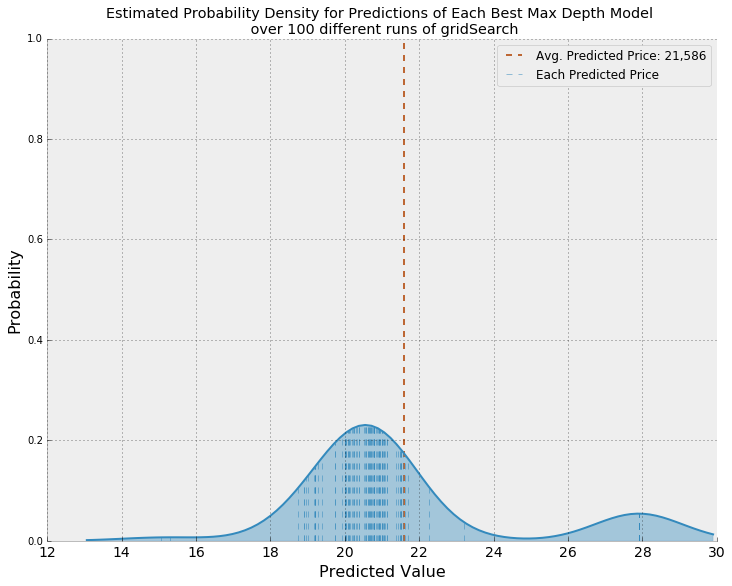

In [240]:
plot_prediction_distribution(many_iter)

In [241]:
%matplotlib inline

# Load data
city_data = load_data()

# Explore the data
explore_city_data(city_data)

# Training/Test dataset split
X_train, y_train, X_test, y_test = split_data(city_data)

# Learning Curve Graphs
# Move logic/flow control out of main() and pass list as argument to our learning_curve function.
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Number of houses in data set: 506
Number of features: 13
Minimum house price in dataset: 5.0
Maximum house price in dataset: 50.0
Average house price: 22.5328063241
Median house price: 21.2
House price standard deviation: 9.18801154528


/home/fch/GPU_2.7/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/fch/GPU_2.7/lib/python2.7/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


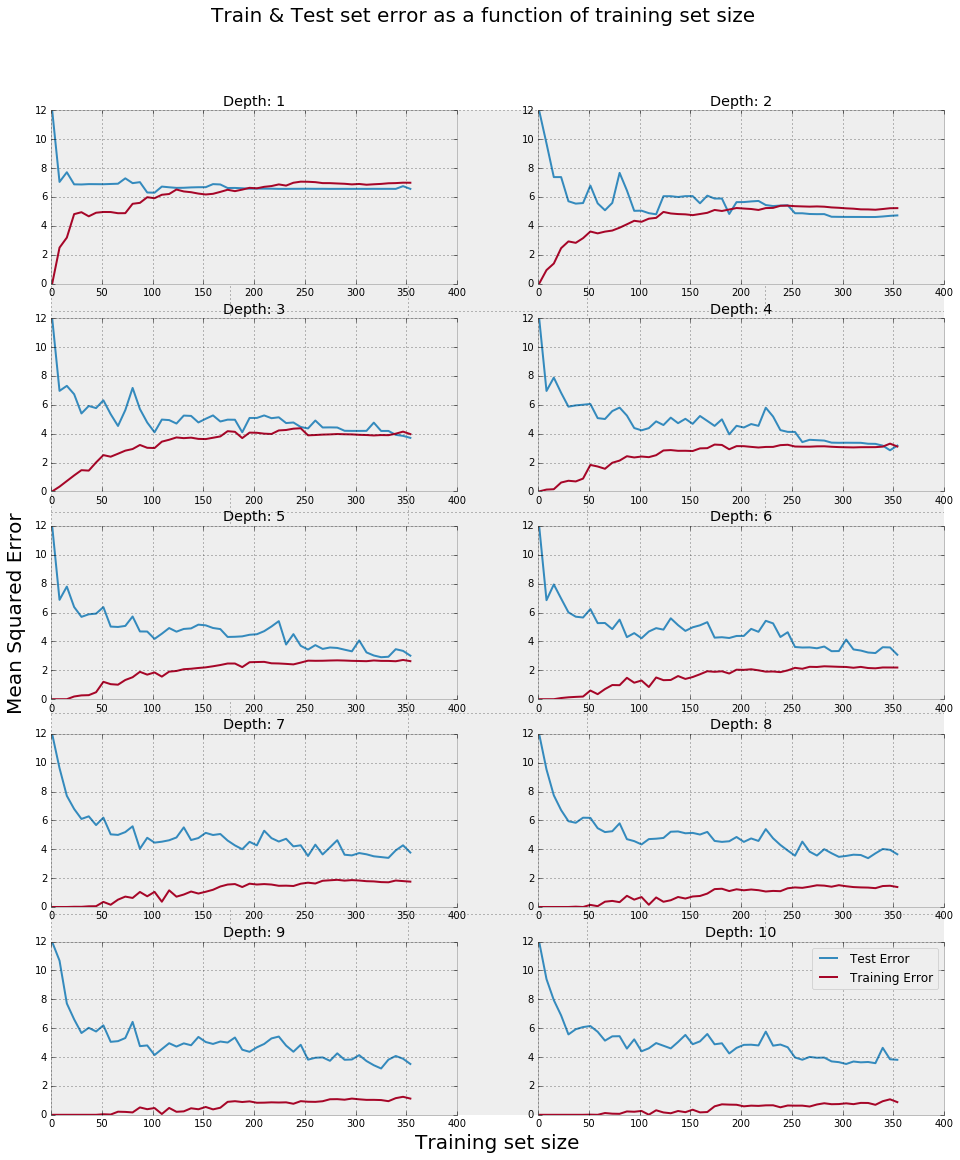

In [242]:
learning_curve(max_depths, X_train, y_train, X_test, y_test)

Model Complexity: 


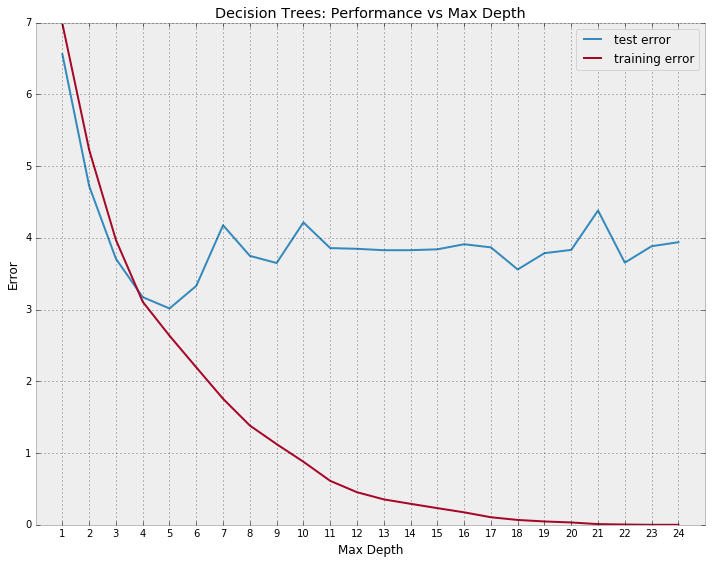

In [266]:
# Model Complexity Graph
model_complexity(X_train, y_train, X_test, y_test)

In [244]:
# Tune and predict Model
fit_predict_model(city_data)

Final Model: 
GridSearchCV(cv=sklearn.cross_validation.KFold(n=455, n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(performance_metric, greater_is_better=False),
       verbose=0)
********************************************************************************
Best Estimator: DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

Be

GridSearchCV(cv=sklearn.cross_validation.KFold(n=455, n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(performance_metric, greater_is_better=False),
       verbose=0)

In [199]:
# Tune and predict Model over many iterations.
many_iter = fit_predict_many(city_data, n=100)

In [ ]:
# plot_hist_best_max_depths(many_iter)
plot_prediction_distribution(many_iter)

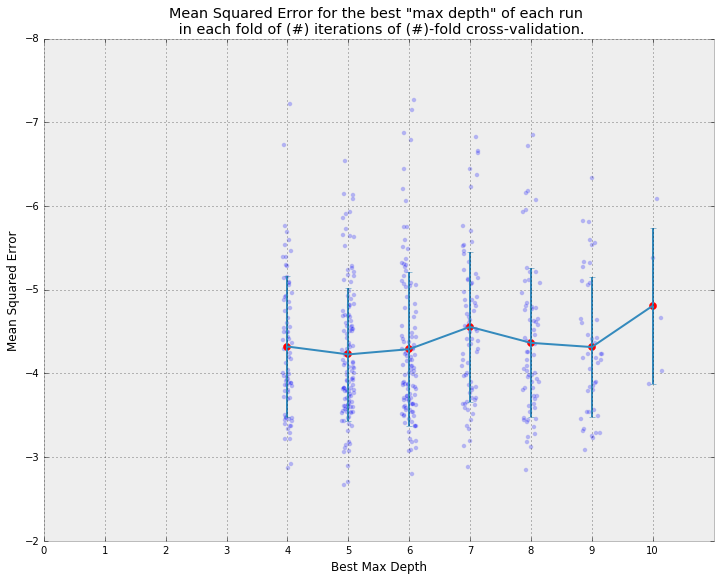

In [268]:
plot_all_distributions(many_iter)

## Alogog

sdasdfasdasdadas
